In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文

%matplotlib inline
#matplotlib 是python擴充的畫圖funtion，inline表示將圖表鑲嵌進netbook(不會在新視窗中呈現)
#%用於類似下terminal指令

In [2]:
# Load in the train datasets
test = pd.read_csv('data/test.csv', dtype = {'type': np.int32})
train = pd.read_csv('data/train.csv', dtype = {'type': np.int32})
submission = pd.read_csv('data/sample_submission.csv')

# 定義問題-觀察資料

In [3]:
print('test.shape: ')
print(test.shape)
print('train.shape: ')
print(train.shape)
#print("------------------------")
#train.info()

test.shape: 
(1459, 80)
train.shape: 
(1460, 81)


In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


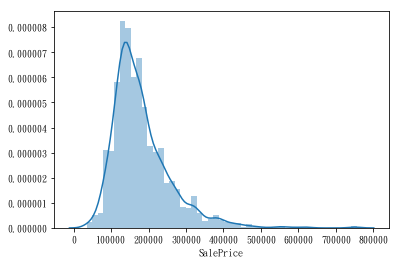

In [6]:
train['SalePrice'].describe()
sns.distplot(train['SalePrice'])

# 處理空值
列出有空值的feature、計算比數

In [7]:
miss_sum = train.isnull().sum()
miss_sum[miss_sum>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# 補值
不同feature選擇補的值不一樣

LotFrontage(int) 正面連接街道 像是公寓就沒有這種數值<br>
Alley(string) 正面道路的類型 公寓也沒有這種數值<br>
MasVnrType(string) 外面砌牆的類型 可能有些房子沒有牆吧!?<br>
MasVnrArea(float) 外面砌牆的面積<br>
BsmtQual(string) 地下室高度<br>
BsmtCond(string) 評估地下室狀況<br>
BsmtExposure(string) 門口、花圃的外牆<br>
BsmtFinType1(string) 地下室成品面積評級<br>
BsmtFinType2(string) 地下室成品面積評級（如果有多種類型）<br>
FireplaceQu(string) 壁爐質量<br>
GarageType(string) 車庫類型<br>
GarageYrBlt(string) 車庫開工年<br>
GarageFinish(string) 車庫見成年<br>
GarageQual(string) 車庫質量<br>
GarageCond(string) 車庫狀況<br>
PoolQC(string) 泳池質量<br>
Fence(string) 圍欄質量<br>
MiscFeature(string) 其他<br>

In [8]:
train[['LotFrontage']] = train[['LotFrontage']].fillna('0')
train[['Alley']] = train[['Alley']].fillna('NA')
train[['MasVnrType']] = train[['MasVnrType']].fillna('NA')
train[['MasVnrArea']] = train[['MasVnrArea']].fillna(0.0)
train[['BsmtQual']] = train[['BsmtQual']].fillna('NA')
train[['BsmtCond']] = train[['BsmtCond']].fillna('NA')
train[['BsmtExposure']] = train[['BsmtExposure']].fillna('NA')
train[['BsmtFinType1']] = train[['BsmtFinType1']].fillna('NA')
train[['BsmtFinType2']] = train[['BsmtFinType2']].fillna('NA')
train[['FireplaceQu']] = train[['FireplaceQu']].fillna('NA')
train[['GarageType']] = train[['GarageType']].fillna('NA')
#train[['GarageYrBlt']] = train[['GarageYrBlt']].fillna('NA')
train[['GarageYrBlt']] = train[['GarageYrBlt']].fillna(np.mean(train[['GarageYrBlt']]))
train[['GarageFinish']] = train[['GarageFinish']].fillna('NA')
train[['GarageQual']] = train[['GarageQual']].fillna('NA')
train[['GarageCond']] = train[['GarageCond']].fillna('NA')
train[['PoolQC']] = train[['PoolQC']].fillna('NA')
train[['Fence']] = train[['Fence']].fillna('NA')
train[['MiscFeature']] = train[['MiscFeature']].fillna('NA')

# 刪除空值
Electrical(string) 電力系統<br>
因為房子不可能沒有電力系統，所以直接刪除這筆資料，並更新index<br>
這是直接刪除所有train裡有空值的列，但是因為我們剛剛把其他值都補上了，所以可以直接拿來刪除。

In [9]:
train = train.dropna().reset_index(drop=True)

# Encoding

In [10]:
train['MSZoning'] = train['MSZoning'].replace({'A':1, 'C (all)':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8})
train['Street'] = train['Street'].replace({'Grvl':1 , 'Pave':2})
train['Alley'] = train['Alley'].replace({'Grvl':1, 'Pave':2, 'NA':3})
train['LotShape'] = train['LotShape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})
train['LandContour'] = train['LandContour'].replace({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4})
train['Utilities'] = train['Utilities'].replace({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
train['LotConfig'] = train['LotConfig'].replace({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5})
train['LandSlope'] = train['LandSlope'].replace({'Gtl':1, 'Mod':2, 'Sev':3})
train['Neighborhood'] = train['Neighborhood'].replace({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5, 'CollgCr':6, 'Crawfor':7, 'Edwards':8, 'Gilbert':9, 'IDOTRR':10, 'MeadowV':11, 'Mitchel':12, 'NAmes':13, 'NoRidge':14, 'NPkVill':15, 'NridgHt':16, 'NWAmes':17, 'OldTown':18, 'SWISU':19, 'Sawyer':20, 'SawyerW':20, 'Somerst':21, 'StoneBr':22, 'Timber':23, 'Veenker':24})
train['Condition1'] = train['Condition1'].replace({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9})
train['Condition2'] = train['Condition2'].replace({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9})
train['BldgType'] = train['BldgType'].replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5})
train['HouseStyle'] = train['HouseStyle'].replace({'1Story':1, '1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5, '2.5Unf':6, 'SFoyer':7, 'SLvl':8})
train['RoofStyle'] = train['RoofStyle'].replace({'Flat':1, 'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5, 'Shed':6})
train['RoofMatl'] = train['RoofMatl'].replace({'ClyTile':1, 'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5, 'Tar&Grv':6, 'WdShake':7, 'WdShngl':8})
train['Exterior1st'] = train['Exterior1st'].replace({'AsbShng':1, 'AsphShn':2, 'Brk Cmn':3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Sdng':16, 'WdShing':17, 'Wd Shng':16, 'BrkComm':3})
train['Exterior2nd'] = train['Exterior2nd'].replace({'AsbShng':1, 'AsphShn':2, 'Brk Cmn':3, 'BrkFace':4, 'CBlock':5, 'CmentBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Shng':16, 'WdShing':17, 'Wd Sdng':16})
train['MasVnrType'] = train['MasVnrType'].replace({'BrkCmn':1, 'BrkFace':2, 'CBlock':3, 'None':4, 'Stone':5, 'NA':4})
train['ExterQual'] = train['ExterQual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['ExterCond'] = train['ExterCond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['Foundation'] = train['Foundation'].replace({'BrkTil':1, 'CBlock':2, 'PConc':3, 'Slab':4, 'Stone':5, 'Wood':6})
train['BsmtQual'] = train['BsmtQual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
train['BsmtCond'] = train['BsmtCond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
train['BsmtExposure'] = train['BsmtExposure'].replace({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5})
train['BsmtFinType1'] = train['BsmtFinType1'].replace({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
train['BsmtFinType2'] = train['BsmtFinType2'].replace({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
train['Heating'] = train['Heating'].replace({'Floor':1, 'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6})
train['HeatingQC'] = train['HeatingQC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['CentralAir'] = train['CentralAir'].replace({'N':1, 'Y':2})
train['Electrical'] = train['Electrical'].replace({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5})
train['KitchenQual'] = train['KitchenQual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['Functional'] = train['Functional'].replace({'Typ':1, 'Min1':2, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
train['FireplaceQu'] = train['FireplaceQu'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
train['GarageType'] = train['GarageType'].replace({'2Types':1, 'Attchd':2, 'Basment':3, 'BuiltIn':4, 'CarPort':5, 'Detchd':6, 'NA':7})
train['GarageFinish'] = train['GarageFinish'].replace({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
train['GarageQual'] = train['GarageQual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
train['GarageCond'] = train['GarageCond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
train['PavedDrive'] = train['PavedDrive'].replace({'Y':1, 'P':2, 'N':3})
train['PoolQC'] = train['PoolQC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5})
train['Fence'] = train['Fence'].replace({'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4, 'NA':5})
train['MiscFeature'] = train['MiscFeature'].replace({'Elev':1, 'Gar2':2, 'Othr':3, 'Shed':4, 'TenC':5, 'NA':6})
train['SaleType'] = train['SaleType'].replace({'WD':1, 'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':6, 'ConLw':7, 'ConLI':8, 'ConLD':9, 'Oth':10})
train['SaleCondition'] = train['SaleCondition'].replace({'Normal':1, 'Abnorml':2, 'AdjLand':3, 'Alloca':4, 'Family':5, 'Partial':6})

#train[''] = train[''].replace({})
train['Street'].sample(5)

1104    2
632     2
966     2
1434    2
1190    2
Name: Street, dtype: int64

# 正規化

In [11]:
#train = preprocessing.scale(train, axis=0)

# 初次放進模型學習

In [12]:
from sklearn.model_selection import train_test_split

X = train[['Id', 'MSSubClass', 'MSZoning','LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1','Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF','2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces','FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF','OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold','YrSold', 'SaleType',
       'SaleCondition']]
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [13]:
import xgboost as xgb
from sklearn import metrics

#n_estimators = 起始樹的種子
#max_depth = 每棵樹要分幾層
gbm = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4).fit(X_train, y_train)

print(metrics.classification_report(y_test, gbm.predict(X_test)))
print("Score:", gbm.score(X_test, y_test))

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields LotFrontage

# 查看feature間的相關性
挑選跟price相關性>50%的

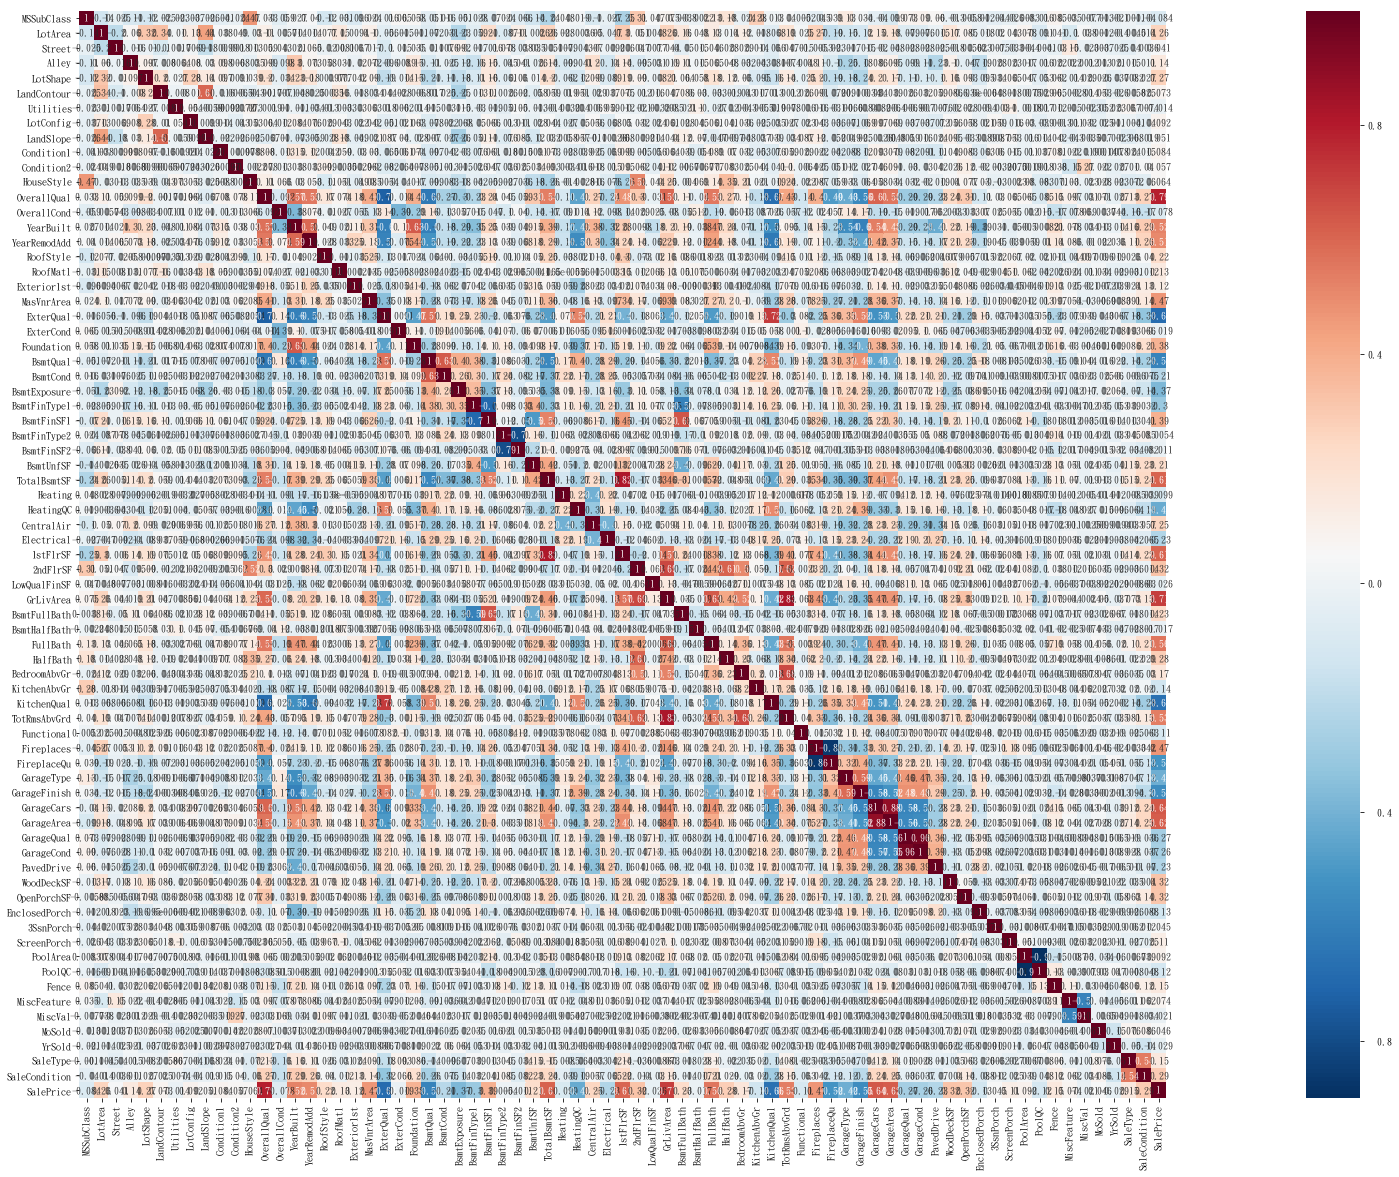

In [13]:
corr = train.iloc[:,1:81].corr()
#把所有feature 都餵進去
plt.figure(figsize=(50,20))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
#sns.plt.show()

# http://seaborn.pydata.org/tutorial/color_palettes.html

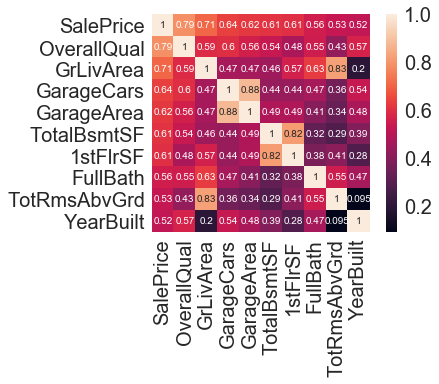

In [14]:
#列出與sale price相關性前9高的
#順便把彼此間先關性高的刪掉
k = 10 #number of variables for heatmap

cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(train[cols].values.T)

sns.set(font_scale=2)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()